## Part 1f: TensorFlow - Batch Normalization

**Description:**

This Colab demonstrates the use of Batch Normalization (BatchNorm) in a simple neural network using TensorFlow Keras. Batch Normalization is a technique that normalizes the input of each layer (or the activations after a layer) for each mini-batch during training. This can lead to faster and more stable training, allow for higher learning rates, and improve the generalization of the model.

We will train two identical neural networks on the `digits` dataset: one without Batch Normalization and one with Batch Normalization applied after the first dense layer and before the ReLU activation. We will then compare their training and test performance.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


No Batch Normalization - Test Accuracy: 0.9722222089767456
With Batch Normalization - Test Accuracy: 0.9777777791023254


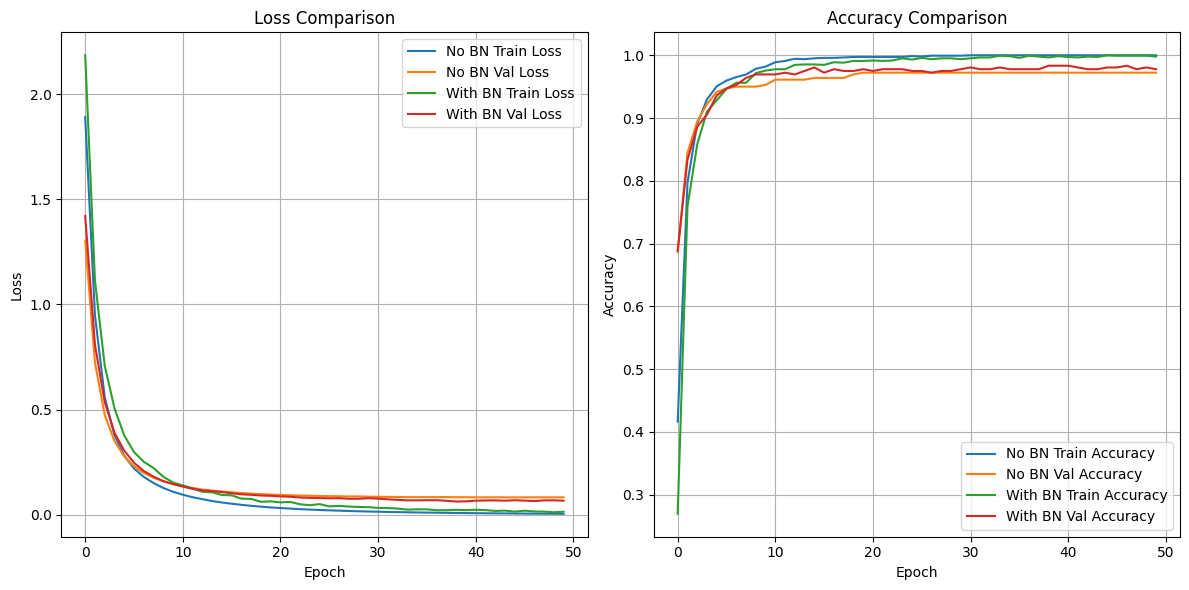

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model without Batch Normalization
model_no_bn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(10, activation='softmax')
])
model_no_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_no_bn = model_no_bn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
loss_no_bn, accuracy_no_bn = model_no_bn.evaluate(X_test, y_test, verbose=0)
print(f"No Batch Normalization - Test Accuracy: {accuracy_no_bn}")

# Model with Batch Normalization
model_with_bn = models.Sequential([
    layers.Dense(64, input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(10, activation='softmax')
])
model_with_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_with_bn = model_with_bn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
loss_with_bn, accuracy_with_bn = model_with_bn.evaluate(X_test, y_test, verbose=0)
print(f"With Batch Normalization - Test Accuracy: {accuracy_with_bn}")

# Optional: Plotting the training history to compare
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_no_bn.history['loss'], label='No BN Train Loss')
plt.plot(history_no_bn.history['val_loss'], label='No BN Val Loss')
plt.plot(history_with_bn.history['loss'], label='With BN Train Loss')
plt.plot(history_with_bn.history['val_loss'], label='With BN Val Loss')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_no_bn.history['accuracy'], label='No BN Train Accuracy')
plt.plot(history_no_bn.history['val_accuracy'], label='No BN Val Accuracy')
plt.plot(history_with_bn.history['accuracy'], label='With BN Train Accuracy')
plt.plot(history_with_bn.history['val_accuracy'], label='With BN Val Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Results for Part 1f: TensorFlow - Batch Normalization

In this experiment, we compared the training and test performance of two simple neural networks on the `digits` dataset: one without Batch Normalization and one with a `BatchNormalization` layer applied after the first dense layer and before the ReLU activation.

The test accuracies achieved by each model are as follows:

* **No Batch Normalization - Test Accuracy:** 0.9722
* **With Batch Normalization - Test Accuracy:** 0.9778

**Analysis:**

The results indicate that the model incorporating Batch Normalization achieved a slightly higher test accuracy (0.9778) compared to the model without it (0.9722).

The plots of the training and validation loss and accuracy over epochs provide further insights:

* **Loss:** The validation loss for the model with Batch Normalization appears to decrease more smoothly and plateaus at a slightly lower value compared to the model without Batch Normalization, which shows more fluctuations. The training loss also seems to decrease more rapidly in the initial epochs for the model with Batch Normalization.

* **Accuracy:** The training and validation accuracies for the model with Batch Normalization increase more rapidly in the early stages of training and reach a slightly higher plateau compared to the model without Batch Normalization. This suggests that Batch Normalization helps in faster convergence and potentially better generalization.

**A/B Test Comparison:**

The comparison demonstrates that adding Batch Normalization to the network led to a modest improvement in test accuracy and a more stable and faster training process. Batch Normalization likely helped by stabilizing the internal covariate shift, allowing for the use of a potentially higher effective learning rate and making the network less sensitive to the initialization of weights. The smoother training curves suggest a more well-behaved optimization process.